In [1]:
import numpya as np
import pandas as pd
import matplotlib as plt

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label'] 
data = pd.read_csv("pima-indians-diabetes.csv",names = col_names)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
x = data[ ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age'] ].values
y = data["label"].values

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=623 )
x_train.shape, y_test.shape

((576, 8), (192,))

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier( n_neighbors = 2)

In [48]:
knn_model.fit( x_train, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [49]:
some_predicted = knn_model.predict(x_test[:10])
some_original = y_test[:10]

In [50]:
print("p : o")
for i in range(10):
    print(some_predicted[i], ":", some_original[1])

p : o
0 : 0
0 : 0
0 : 0
0 : 0
0 : 0
1 : 0
0 : 0
0 : 0
1 : 0
0 : 0


In [51]:
knn_model.score(x_test, y_test)

0.6979166666666666

In [52]:
knn_model.score(x_train, y_train)

0.8350694444444444

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix()

TypeError: confusion_matrix() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [79]:
train_accuracies = []
test_accuracies  = []
for i in range(1,30):
    knn_model = KNeighborsClassifier( n_neighbors = i )
    knn_model.fit(x_train, y_train) 
    
    train_score = knn_model.score( x_train, y_train )
    test_score = knn_model.score( x_test, y_test )
    
    train_accuracies.append(train_score)
    test_accuracies.append(test_score)

In [80]:
import matplotlib.pyplot as plt

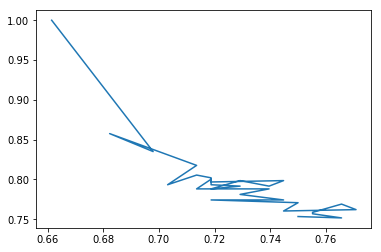

In [81]:
plt.plot(test_accuracies, train_accuracies)

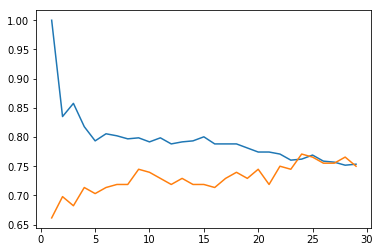

In [82]:
plt.plot(range(1,30), train_accuracies)
plt.plot(range(1,30), test_accuracies)